<h1>AI in Fact and Fiction - Summer 2021</h1>
<h2>Natural Language Proceesing</h2>

In this lab, we will explore several natural lanugage processing techniques (including deep learning models) to perform some useful language tasks.

* Use [Google Colab](https://colab.research.google.com/github/AIFictionFact/Summer2021/blob/master/lab3.ipynb) to run the python code, and to complete any missing lines of code.
* You might find it helpful to save this notebook on your Google Drive.
* Please make sure to fill the required information in the **Declaration** cell.
* Once you complete the lab, please download the .ipynb file (File --> Download .ipynb).
* Then, please use the following file naming convention to rename the downloaded python file lab3_YourRCS.ipynb (make sure to replace 'YourRCS' with your RCS ID, for example 'lab3_senevo.ipynb').
* Submit the .ipynb file in LMS.

<p>Due Date/Time: <b>Friday, Jul 23 1.00 PM ET</b></p>

<p>Estimated Time Needed: <b>4 hours</b></p>

<p>Total Tasks: <b><strike>15</strike> <font color='red'>14</font></b></p>
<p>Total Points: <b><strike>50</strike> <font color='red'>45</font></b></p>

<hr>


**Declaration**

*Your Name* : 

*Your RCS ID* : 

*Collaborators (if any)* : none

*Online Resources consulted (if any):* none

# Part 1 - Data Cleaning and Exploratory Data Analysis

Data cleaning is a time consuming and unenjoyable task, yet it's a very important one. Keep in mind, "garbage in, garbage out". Feeding dirty data into a model will give us results that are meaningless.

Specifically, we'll be walking through:

1. **Getting the data** - in this case, we'll be scraping data from a website
2. **Cleaning the data** - we will walk through popular text pre-processing techniques
3. **Organizing the data** - we will organize the cleaned data into a way that is easy to input into other algorithms

The output of this part of the lab will be clean, organized data in two standard text formats:

* Corpus - a collection of text
* Document-Term Matrix - word counts in matrix format

We will try to scrape IMDB movie reviews from the IMDB website in this part.

## Getting the Data

This is the part where you have to do a bit of data sleuthing. I checked the IMDB Website and discovered that the movie reviews are available at 
https://www.imdb.com/title/[movie_id]/reviews, and that each individual review is in an HTML tag called "content."

In [2]:
# Web scraping, pickle imports
import requests
from bs4 import BeautifulSoup
import pickle

# Scrapes the reviews
def url_to_review(url):
    '''Returns review data specifically from imdb.com.'''
    page = requests.get(url).text
    soup = BeautifulSoup(page, "html.parser")
    reviews = []
    for row in soup.find_all(class_="content"):
      reviews.append(row.text)
    return reviews

# Names of the movies we have seen / will see in this class
movies = ['The Day the Earth Stood Still', 
          '2001: A Space Odyssey', 
          'Short Circuit']

# Movie Review URLs on IMDB 
urls = ['https://www.imdb.com/title/tt0043456/reviews',
        'https://www.imdb.com/title/tt0062622/reviews',
        'https://www.imdb.com/title/tt0091949/reviews']

# This may takes a few minutes to run
reviews = [url_to_review(u) for u in urls]

print(reviews)

[['\nTHE DAY THE EARTH STOOD STILL is such a basic Science Fiction story that many first-time viewers have been stunned by the reverence in which it is held. An alien arrives on earth, is misunderstood and is nearly killed, passes a warning to mankind to not carry the weapons of potential nuclear war into space, or face annihilation, then leaves. The FX are minimal, there are no \'space battles\' or \'monsters\', even the score, by the legendary composer Bernard Herrmann, is simple, lacking the bombast of later \'epics\'. Yet in it\'s very simplicity, director Robert Wise has created a tale more timeless and relevant than many other \'message\'-driven SF blockbusters that followed.Based on Harry Bates\' short story, "Farewell to the Master", which paints a far less friendly view of our galactic community (Gort, the enforcer robot, is revealed to be the true \'Master\' of the story, not Klaatu, thus revealing that machines are controlling the Universe), 20th Century Fox and director Wis

A good practice is to save (pickle) the files for later use. Also, note how we are replacing the spaces with underscores in the movie name.

In [3]:
# # Make a new directory to hold the text files. You need to run this only once.
!mkdir reviews

for i, movie in enumerate(movies):
    movie_file_name = movie.replace(" ", "_")
    with open("reviews/" + movie_file_name + ".txt", "wb") as file:
        pickle.dump(reviews[i], file)

Now let's load the pickled files.

In [4]:
# Load pickled files
data = {}
for i, movie in enumerate(movies):
    movie_file_name = movie.replace(" ", "_")
    with open("reviews/" + movie_file_name + ".txt", "rb") as file:
        data[movie] = pickle.load(file)

Let's double check if the data has been loaded properly.

In [5]:
# Double check to make sure data has been loaded properly
data.keys()

dict_keys(['The Day the Earth Stood Still', '2001: A Space Odyssey', 'Short Circuit'])

More checks.

In [6]:
data['The Day the Earth Stood Still'][:2]

['\nTHE DAY THE EARTH STOOD STILL is such a basic Science Fiction story that many first-time viewers have been stunned by the reverence in which it is held. An alien arrives on earth, is misunderstood and is nearly killed, passes a warning to mankind to not carry the weapons of potential nuclear war into space, or face annihilation, then leaves. The FX are minimal, there are no \'space battles\' or \'monsters\', even the score, by the legendary composer Bernard Herrmann, is simple, lacking the bombast of later \'epics\'. Yet in it\'s very simplicity, director Robert Wise has created a tale more timeless and relevant than many other \'message\'-driven SF blockbusters that followed.Based on Harry Bates\' short story, "Farewell to the Master", which paints a far less friendly view of our galactic community (Gort, the enforcer robot, is revealed to be the true \'Master\' of the story, not Klaatu, thus revealing that machines are controlling the Universe), 20th Century Fox and director Wise

### Task 1 (5 points)

Write code to append your two favorite movies to the `movies` list and the `urls` list. Retrieve the reviews into a variable called `my_reviews`, and pickle those new movie reviews. Load the pickled files, print the total number of reviews for each movie, and the last review in the dataset for each movie.

In [7]:
# Type code for Task 1 here.

# 1 point for picking any two valid movies and movie reviews
my_movies = ['A.I. Artificial Intelligence', 'Blade Runner']
my_urls = ['https://www.imdb.com/title/tt3531824/reviews',
           'https://www.imdb.com/title/tt0083658/reviews']
movies = movies + my_movies
urls = urls + my_urls

# 1 point for retrieving the reviews for the new movies
my_reviews = [url_to_review(u) for u in my_urls]

# 1 point for pickling the movie reviews
for i, movie in enumerate(my_movies):
    movie_file_name = movie.replace(" ", "_")
    with open("reviews/" + movie_file_name + ".txt", "wb") as file:
        pickle.dump(my_reviews[i], file)

# 1 point for loading the movie reviews
for i, movie in enumerate(my_movies):
    movie_file_name = movie.replace(" ", "_")
    with open("reviews/" + movie_file_name + ".txt", "rb") as file:
        data[movie] = pickle.load(file)

# 1 point for printing the total n and the last movie review.
# none of the values should be hard-coded here.
# it is okay if the students print info for all 5 movies, instead of the 
# 2 newly added movies
for i, movie in enumerate(my_movies):
  print("Total number of reviews for ", movie, ": ",len(data[movie]), sep='')
  print(data[movie][-1])

Total number of reviews for A.I. Artificial Intelligence: 25

I found the synopsis intriguing, but despite a fairly novel concept, I thought the movie itself was lacking in something. The acting was okay, for the most part, but the whole idea was a bit far-fetched. Yes, I get the moral message, but the idea that this could actually happen, in real time - is nuts! I hope to god this doesn't spawn several Internet themed movies, in the same way 'found movies' did. Haven't we got enough social media in the world, without making movies about it? I suspect this will appeal to the younger person, but it just didn't do it for me. I feel this movie has missed the boat somewhat.....we've already had the ice-bucket challenge, cinnamon challenge, drinking challenges etc etc etc... I agree totally that some clown will try to invent something like this and there will always be bigger clowns who will try to compensate for their lack of a brain by morphing into a sheep and BAAAA copying it. I dare fo

## Cleaning the Data


When dealing with numerical data, data cleaning often involves removing null values and duplicate data, dealing with outliers, etc. With text data, there are some common data cleaning techniques, which are also known as text pre-processing techniques.

With text data, this cleaning process can go on forever. There's always an exception to every cleaning step. So, we're going to follow the MVP (minimum viable product) approach - start simple and iterate. Here are a bunch of things you can do to clean your data. We're going to execute just the common cleaning steps here and the rest can be done at a later point to improve our results.

**Common data cleaning steps on all text:**

* Make text all lower case
* Remove punctuation
* Remove numerical values
* Remove common non-sensical text (/n)
* Tokenize text
* Remove stop words

**More data cleaning steps after tokenization:** 

* Stemming / lemmatization
* Parts of speech tagging
* Create bi-grams or tri-grams
* Deal with typos
* And more...

In [8]:
# Let's take a look at our data again
next(iter(data.keys()))

'The Day the Earth Stood Still'

In [9]:
# Notice that our dictionary is currently in key: movie, value: list of text format
next(iter(data.values()))

['\nTHE DAY THE EARTH STOOD STILL is such a basic Science Fiction story that many first-time viewers have been stunned by the reverence in which it is held. An alien arrives on earth, is misunderstood and is nearly killed, passes a warning to mankind to not carry the weapons of potential nuclear war into space, or face annihilation, then leaves. The FX are minimal, there are no \'space battles\' or \'monsters\', even the score, by the legendary composer Bernard Herrmann, is simple, lacking the bombast of later \'epics\'. Yet in it\'s very simplicity, director Robert Wise has created a tale more timeless and relevant than many other \'message\'-driven SF blockbusters that followed.Based on Harry Bates\' short story, "Farewell to the Master", which paints a far less friendly view of our galactic community (Gort, the enforcer robot, is revealed to be the true \'Master\' of the story, not Klaatu, thus revealing that machines are controlling the Universe), 20th Century Fox and director Wise

In [10]:
# We are going to change this to key: movie, value: string format
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

# Combine it!
data_combined = {key: [combine_text(value)] for (key, value) in data.items()}

We can either keep it in dictionary format or put it into a pandas dataframe.

In [11]:
import pandas as pd
pd.set_option('max_colwidth',150)

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['review']
data_df = data_df.sort_index()
data_df

,review
2001: A Space Odyssey,"\nA stand-alone monument in cinema history, Stanley Kubrick's magnum opus 2001: A Space Odyssey (1968) is an undeniable masterpiece. 2001 not only..."
A.I. Artificial Intelligence,"\nIf you consider the concept only, it could have been a decent film, if it were more along the lines of the manga, Dead Tube, it could have furth..."
Blade Runner,\nA feast for the eyes. Dark and uncompromising. With a haunting musical score by Vangelis that adds a hypnotic quality to those breathtaking mega...
Short Circuit,"\nThere have been many films that claim they can entertain audiences of all ages. Indeed, this seems to be the most profitable kind of film to mak..."
The Day the Earth Stood Still,\nTHE DAY THE EARTH STOOD STILL is such a basic Science Fiction story that many first-time viewers have been stunned by the reverence in which it ...


Let's take a look at the reviews for "The Day the Earth Stood Still"

In [12]:
data_df.review.loc['The Day the Earth Stood Still']

'\nTHE DAY THE EARTH STOOD STILL is such a basic Science Fiction story that many first-time viewers have been stunned by the reverence in which it is held. An alien arrives on earth, is misunderstood and is nearly killed, passes a warning to mankind to not carry the weapons of potential nuclear war into space, or face annihilation, then leaves. The FX are minimal, there are no \'space battles\' or \'monsters\', even the score, by the legendary composer Bernard Herrmann, is simple, lacking the bombast of later \'epics\'. Yet in it\'s very simplicity, director Robert Wise has created a tale more timeless and relevant than many other \'message\'-driven SF blockbusters that followed.Based on Harry Bates\' short story, "Farewell to the Master", which paints a far less friendly view of our galactic community (Gort, the enforcer robot, is revealed to be the true \'Master\' of the story, not Klaatu, thus revealing that machines are controlling the Universe), 20th Century Fox and director Wise 

Apply a first round of text cleaning techniques.

In [13]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, 
    remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

Let's take a look at the updated text.


In [14]:
data_clean = pd.DataFrame(data_df.review.apply(round1))
data_clean

,review
2001: A Space Odyssey,\na standalone monument in cinema history stanley kubricks magnum opus a space odyssey is an undeniable masterpiece not only shattered science ...
A.I. Artificial Intelligence,\nif you consider the concept only it could have been a decent film if it were more along the lines of the manga dead tube it could have further p...
Blade Runner,\na feast for the eyes dark and uncompromising with a haunting musical score by vangelis that adds a hypnotic quality to those breathtaking megaci...
Short Circuit,\nthere have been many films that claim they can entertain audiences of all ages indeed this seems to be the most profitable kind of film to make ...
The Day the Earth Stood Still,\nthe day the earth stood still is such a basic science fiction story that many firsttime viewers have been stunned by the reverence in which it i...


### Task 2 (5 points)

Let's apply a second round of cleaning to get rid of some additional punctuation and non-sensical text that was missed the first time around. Hint: we do not want the `\n`. Similary, please check the reviews to see if there are any such characters we need to clean out. Please complete the `clean_text_round2` function.

In [15]:
# optional -- for checking what more to clean out 
print("Before round 2: (example review dataset for a movie)", data_clean.review.loc[movies[0]])

# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    # Type your code here
    # 2 points for cleaning the data (full points for doing 2/3 below)
    # some of the things to try:
    # (1) remove any of the puntuations
    text = re.sub('[‘’“”…]', '', text)
    # (2) remove new line characters
    text = re.sub('\n','',text)
    return text

# 2 points for cleaning the data
round2 = lambda x: clean_text_round2(x)
data_clean2 = pd.DataFrame(data_clean.review.apply(round2))
# 1 point for inspecting the output, either using the dataframe or printing a single review
print("After round 2: (the data frame)", data_clean2)
print("\n")
print("After round 2: (example movie_review)", data_clean2.review.loc[my_movies[0]])

# Optionally save the cleaned data frame
data_clean2.to_pickle("corpus_cleaned.pkl")

Before round 2: (example review dataset for a movie) 
the day the earth stood still is such a basic science fiction story that many firsttime viewers have been stunned by the reverence in which it is held an alien arrives on earth is misunderstood and is nearly killed passes a warning to mankind to not carry the weapons of potential nuclear war into space or face annihilation then leaves the fx are minimal there are no space battles or monsters even the score by the legendary composer bernard herrmann is simple lacking the bombast of later epics yet in its very simplicity director robert wise has created a tale more timeless and relevant than many other messagedriven sf blockbusters that followedbased on harry bates short story farewell to the master which paints a far less friendly view of our galactic community gort the enforcer robot is revealed to be the true master of the story not klaatu thus revealing that machines are controlling the universe  century fox and director wise quic

## Organizing The Data
We mentioned earlier that the output of this notebook will be clean, organized data in two standard text formats:

* Corpus - a collection of text
* Document-Term Matrix - word counts in matrix format

**Corpus**

We already created a corpus in an earlier step. The definition of a corpus is a collection of texts, and they are all put together neatly in a pandas dataframe here.

In [16]:
# Let's take a look at our dataframe
data_df

,review
2001: A Space Odyssey,"\nA stand-alone monument in cinema history, Stanley Kubrick's magnum opus 2001: A Space Odyssey (1968) is an undeniable masterpiece. 2001 not only..."
A.I. Artificial Intelligence,"\nIf you consider the concept only, it could have been a decent film, if it were more along the lines of the manga, Dead Tube, it could have furth..."
Blade Runner,\nA feast for the eyes. Dark and uncompromising. With a haunting musical score by Vangelis that adds a hypnotic quality to those breathtaking mega...
Short Circuit,"\nThere have been many films that claim they can entertain audiences of all ages. Indeed, this seems to be the most profitable kind of film to mak..."
The Day the Earth Stood Still,\nTHE DAY THE EARTH STOOD STILL is such a basic Science Fiction story that many first-time viewers have been stunned by the reverence in which it ...


In [17]:
# Let's pickle it for later use
data_df.to_pickle("corpus.pkl")

**Document-Term Matrix**

For many of the techniques we'll be doing later in this lab, the text must be tokenized, meaning broken down into smaller pieces. The most common tokenization technique is to break down text into words. We can do this using scikit-learn's CountVectorizer, where every row will represent a different document and every column will represent a different word.

In addition, with CountVectorizer, we can remove stop words. Stop words are common words that add no additional meaning to text such as 'a', 'the', etc.

In [18]:
# We are going to create a document-term matrix using CountVectorizer, 
# and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.review)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

,abandonment,abilities,ability,able,aboard,aboutbeauty,absence,absent,absolute,absolutely,absorb,absorbed,absorbing,absurd,abuse,abusive,academically,academy,accelerated,accent,accentuated,accentuation,accept,accepted,accessory,accidental,accidentally,acclaimed,accolades,accompanied,accompanies,accomplish,accomplished,accomplishment,according,account,accurate,accurately,accustomed,achieve,...,writitng,writs,written,wrong,ww,wwii,ya,yeah,yeahright,year,years,yearsadly,yearspeaking,yellow,yes,yesterday,york,youd,youll,youmichael,young,younger,youngest,youngsters,youre,yourselfthe,yourselvesscary,youth,youthe,youtube,youve,yup,zarathustra,zerogravity,zhora,zone,zoo,zooms,zora,zorba
2001: A Space Odyssey,0,0,0,5,0,1,2,1,0,4,0,0,1,0,0,0,0,1,0,0,1,0,2,0,0,0,0,0,1,0,0,1,0,3,0,0,3,1,0,1,...,0,0,0,5,0,0,0,1,0,3,10,0,0,0,3,0,1,1,3,0,0,0,0,0,2,1,0,0,0,1,0,0,9,3,0,0,1,0,0,0
A.I. Artificial Intelligence,0,0,0,1,0,0,0,0,1,4,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,...,1,0,1,2,0,0,1,0,0,3,6,0,0,0,3,0,1,0,5,0,4,4,1,0,2,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
Blade Runner,1,0,1,2,0,0,0,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,...,0,0,0,2,0,0,0,0,0,4,8,0,0,0,1,0,0,0,0,0,4,0,0,0,4,0,0,0,1,0,4,0,0,0,1,0,0,1,1,0
Short Circuit,0,0,1,3,1,0,0,0,0,1,0,0,0,0,1,1,0,4,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0,10,1,1,0,1,0,0,0,1,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
The Day the Earth Stood Still,0,1,2,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,...,0,0,4,1,2,1,0,1,1,2,19,0,0,1,3,2,1,0,0,1,7,0,0,0,0,0,1,0,0,0,0,1,0,0,0,3,0,0,0,1


Let's pickle it for later use.

In [19]:
data_dtm.to_pickle("dtm.pkl")

Let's also pickle the cleaned data (before we put it in document-term matrix format) and the CountVectorizer object.

In [20]:
data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))

### Task 3 (5 points)

Play around with CountVectorizer's parameters. (Type your code in the cell below.)

What is ngram_range? What is min_df? and max_df? (This is a written question, and please type your answer in the cell below the next.)

In [21]:
# Type your code to experiment with the CountVectorizer's parameters (2 points)
# The
import numpy as np

# This is the count vectorizer's full signature, with various parameter values
# The 2 points are awarded for demonstrating the use of ngram_range, max_df, and min_df
CountVectorizer(input='content', encoding='utf-8', decode_error='strict', 
                strip_accents=None, lowercase=True, preprocessor=None, 
                tokenizer=None, stop_words=None, token_pattern='(?u)\\b\\w\\w+\\b', 
                ngram_range=(1, 1), analyzer='word', max_df=1.0, min_df=1, 
                max_features=None, vocabulary=None, binary=False, dtype=np.int64)

# Here is a some sample experimentation we would like to see.
# Ideally the CountVectorizer should have been applied to the cleaned up corpus in Task 2
my_cv = CountVectorizer(stop_words='english', ngram_range=(1,1), max_df = 5, min_df = 5)
my_data_cv = my_cv.fit_transform(data_clean2.review)
my_data_dtm = pd.DataFrame(my_data_cv.toarray(), columns=my_cv.get_feature_names())
my_data_dtm.index = data_clean2.index
my_data_dtm

,able,absolutely,action,amazing,appreciate,attempts,audience,audiences,away,bad,believe,best,better,big,bit,boring,brings,called,camera,cause,certainly,chance,character,characters,classic,come,comes,completely,course,create,dangerous,day,deep,did,didnt,does,doesnt,dont,effect,end,...,story,stupid,suddenly,sure,surprised,taken,takes,tell,terms,thats,theres,things,think,thinks,thought,time,times,told,trying,understand,use,used,version,viewer,viewers,vote,want,wants,watch,watched,watching,way,went,wonderful,work,works,world,wouldnt,years,yes
2001: A Space Odyssey,5,4,5,2,4,2,8,4,3,6,2,14,2,2,2,18,2,3,6,1,6,2,5,9,5,5,2,2,4,1,1,3,3,6,3,13,6,12,1,13,...,11,7,3,3,1,2,2,4,3,10,6,14,19,2,2,34,4,7,4,9,8,3,3,4,6,25,6,2,8,9,12,22,4,2,5,4,4,4,10,3
A.I. Artificial Intelligence,1,4,4,1,1,2,5,1,7,4,3,3,5,3,4,3,2,2,1,1,3,1,11,9,4,2,7,3,3,1,1,2,1,9,6,4,8,5,2,12,...,8,2,1,3,1,1,5,1,1,4,5,7,5,1,5,12,3,1,1,1,1,2,2,1,5,25,8,3,10,1,7,12,3,1,2,1,8,2,6,3
Blade Runner,2,1,5,4,5,1,5,3,6,5,2,23,7,8,3,1,4,5,1,1,2,3,10,6,7,3,3,1,3,4,2,5,8,8,5,9,7,5,2,9,...,19,1,1,3,1,1,2,1,1,7,3,8,9,1,4,27,5,3,1,1,3,3,16,5,3,25,5,1,5,2,6,7,1,4,2,1,13,1,8,1
Short Circuit,3,1,1,1,4,2,2,2,4,2,1,2,3,1,4,2,1,3,1,2,2,2,14,10,7,2,4,1,3,1,1,5,2,4,2,5,3,4,1,2,...,6,1,1,2,1,3,6,1,1,4,4,5,14,3,2,16,2,1,1,2,3,5,1,2,2,26,4,1,15,6,7,5,2,2,3,1,3,2,10,1
The Day the Earth Stood Still,2,1,2,3,1,1,2,3,4,1,2,12,4,1,4,1,3,1,3,3,3,2,5,3,18,5,5,2,7,1,1,34,2,5,3,16,2,10,3,4,...,23,2,1,3,1,3,4,1,2,5,2,3,13,1,2,23,5,1,1,1,2,2,3,1,1,25,2,1,7,7,5,8,1,1,7,2,24,2,19,3


__What is ngram_range?__ (1 point)

<font color='red'>The lower and upper boundary of the range of n-values for different word n-grams or char n-grams to be extracted. All values of n such such that min_n <= n <= max_n will be used. For example an ngram_range of (1, 1) means only unigrams, (1, 2) means unigrams and bigrams, and (2, 2) means only bigrams.</font>

__What is min_df?__ (1 point)

<font color='red'>This is used for removing terms that appear too infrequently. Giving a value to this parameter indicates that when building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. For example, min_df = 0.01 means "ignore terms that appear in less than 1% of the documents," min_df = 5 means "ignore terms that appear in less than 5 documents". The default min_df is 1, which means "ignore terms that appear in less than 1 document". Thus, the default setting does not ignore any terms.</font>

__What is max_df?__ (1 point)

<font color='red'> This is used for removing terms that appear too frequently, also known as "corpus-specific stop words." Giving a value to this parameter indicates that when building the vocabulary, ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words). For example, max_df = 0.50 means "ignore terms that appear in more than 50% of the documents," max_df = 25 means "ignore terms that appear in more than 25 documents," and the default max_df is 1.0, which means "ignore terms that appear in more than 100% of the documents." Thus, the default setting does not ignore any terms.</font>


## Exploratory Data Analysis

After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each comedian:

1. **Most common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words

### Most Common Words

Read in the document-term matrix.

In [22]:
data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,2001: A Space Odyssey,A.I. Artificial Intelligence,Blade Runner,Short Circuit,The Day the Earth Stood Still
abandonment,0,0,1,0,0
abilities,0,0,0,0,1
ability,0,0,1,1,2
able,5,1,2,3,2
aboard,0,0,0,1,0


Find the top 30 words in the reviews.

In [23]:
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'2001: A Space Odyssey': [('film', 86),
  ('movie', 65),
  ('helpful', 50),
  ('space', 43),
  ('like', 37),
  ('time', 34),
  ('kubrick', 31),
  ('review', 29),
  ('people', 29),
  ('films', 29),
  ('hal', 29),
  ('sign', 26),
  ('just', 26),
  ('effects', 26),
  ('permalink', 25),
  ('vote', 25),
  ('great', 22),
  ('way', 22),
  ('art', 20),
  ('really', 19),
  ('think', 19),
  ('man', 19),
  ('minutes', 18),
  ('boring', 18),
  ('plot', 17),
  ('ending', 16),
  ('dave', 16),
  ('movies', 15),
  ('sequence', 15),
  ('science', 14)],
 'A.I. Artificial Intelligence': [('movie', 53),
  ('helpful', 50),
  ('film', 46),
  ('good', 27),
  ('review', 27),
  ('nerve', 27),
  ('sign', 25),
  ('permalink', 25),
  ('vote', 25),
  ('really', 25),
  ('game', 24),
  ('like', 22),
  ('just', 20),
  ('roberts', 19),
  ('people', 17),
  ('great', 16),
  ('franco', 15),
  ('social', 12),
  ('emma', 12),
  ('end', 12),
  ('time', 12),
  ('way', 12),
  ('message', 12),
  ('fun', 11),
  ('movies', 11),

Print the top 15 words in each movie review.

In [24]:
for movie, top_words in top_dict.items():
    print(movie)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

2001: A Space Odyssey
film, movie, helpful, space, like, time, kubrick, review, people, films, hal, sign, just, effects
---
A.I. Artificial Intelligence
movie, helpful, film, good, review, nerve, sign, permalink, vote, really, game, like, just, roberts
---
Blade Runner
film, runner, blade, helpful, movie, like, deckard, time, review, permalink, sign, vote, cut, best
---
Short Circuit
movie, helpful, number, film, robot, review, vote, sign, permalink, short, circuit, like, just, guttenberg
---
The Day the Earth Stood Still
movie, earth, helpful, film, message, klaatu, day, sign, vote, review, world, permalink, like, time
---


At this point, we could go on and create word clouds. However, by looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that.

In [25]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for movie in data.columns:
    top = [word for (word, count) in top_dict[movie]]
    for t in top:
        words.append(t)
        
words

['film',
 'movie',
 'helpful',
 'space',
 'like',
 'time',
 'kubrick',
 'review',
 'people',
 'films',
 'hal',
 'sign',
 'just',
 'effects',
 'permalink',
 'vote',
 'great',
 'way',
 'art',
 'really',
 'think',
 'man',
 'minutes',
 'boring',
 'plot',
 'ending',
 'dave',
 'movies',
 'sequence',
 'science',
 'movie',
 'helpful',
 'film',
 'good',
 'review',
 'nerve',
 'sign',
 'permalink',
 'vote',
 'really',
 'game',
 'like',
 'just',
 'roberts',
 'people',
 'great',
 'franco',
 'social',
 'emma',
 'end',
 'time',
 'way',
 'message',
 'fun',
 'movies',
 'character',
 'watch',
 'internet',
 'trailer',
 'media',
 'film',
 'runner',
 'blade',
 'helpful',
 'movie',
 'like',
 'deckard',
 'time',
 'review',
 'permalink',
 'sign',
 'vote',
 'cut',
 'best',
 'replicants',
 'directors',
 'films',
 'story',
 'scott',
 'scifi',
 'science',
 'fiction',
 'human',
 'future',
 'life',
 'ford',
 'version',
 'seen',
 'ridley',
 'really',
 'movie',
 'helpful',
 'number',
 'film',
 'robot',
 'review',
 'v

Let's aggregate this list and identify the most common words along with how many times they occur.

In [26]:
Counter(words).most_common()

[('film', 5),
 ('movie', 5),
 ('helpful', 5),
 ('like', 5),
 ('time', 5),
 ('review', 5),
 ('sign', 5),
 ('permalink', 5),
 ('vote', 5),
 ('just', 4),
 ('people', 3),
 ('films', 3),
 ('really', 3),
 ('science', 3),
 ('good', 3),
 ('space', 2),
 ('great', 2),
 ('way', 2),
 ('think', 2),
 ('man', 2),
 ('movies', 2),
 ('message', 2),
 ('character', 2),
 ('watch', 2),
 ('story', 2),
 ('scifi', 2),
 ('life', 2),
 ('kubrick', 1),
 ('hal', 1),
 ('effects', 1),
 ('art', 1),
 ('minutes', 1),
 ('boring', 1),
 ('plot', 1),
 ('ending', 1),
 ('dave', 1),
 ('sequence', 1),
 ('nerve', 1),
 ('game', 1),
 ('roberts', 1),
 ('franco', 1),
 ('social', 1),
 ('emma', 1),
 ('end', 1),
 ('fun', 1),
 ('internet', 1),
 ('trailer', 1),
 ('media', 1),
 ('runner', 1),
 ('blade', 1),
 ('deckard', 1),
 ('cut', 1),
 ('best', 1),
 ('replicants', 1),
 ('directors', 1),
 ('scott', 1),
 ('fiction', 1),
 ('human', 1),
 ('future', 1),
 ('ford', 1),
 ('version', 1),
 ('seen', 1),
 ('ridley', 1),
 ('number', 1),
 ('robot', 1

If all the movies have it as a top word, exclude it from the list.

In [27]:
add_stop_words = [word for word, count in Counter(words).most_common() if count == len(movies)]
add_stop_words

['film',
 'movie',
 'helpful',
 'like',
 'time',
 'review',
 'sign',
 'permalink',
 'vote']

Let's update our document-term matrix with the new list of stop words.


In [28]:
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.review)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

Let's make some word clouds!

First, install the Wordclouds, if not installed already.

In [29]:
!pip install wordcloud

In [30]:
movie

'The Day the Earth Stood Still'

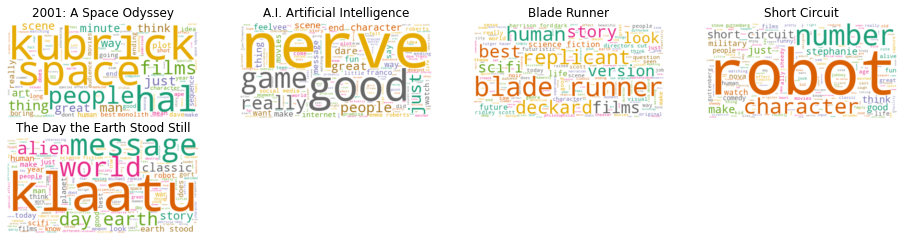

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

# Reset the output dimensions
plt.rcParams['figure.figsize'] = [16, 6]

# Create subplots for each movie
for index, movie in enumerate(data.columns):
    wc.generate(data_clean2.review[movie])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(movie)
    
plt.show()

Find the number of unique words that each set of movie reviews have.

In [32]:
# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for movie in data.columns:
    uniques = data[movie].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(movies, unique_list)), columns=['movie', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,movie,unique_words
3,A.I. Artificial Intelligence,1248
1,2001: A Space Odyssey,1441
4,Blade Runner,1856
2,Short Circuit,2024
0,The Day the Earth Stood Still,2302


Let's plot our findings.

Text(0.5, 1.0, 'Number of Unique Words')

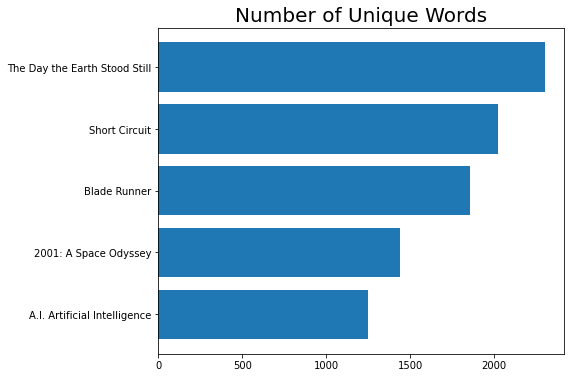

In [33]:
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.movie)
plt.title('Number of Unique Words', fontsize=20)

**Analysis of Specific Movies**

Since these three movies feature Robots, Fiction, and Aliens, let's see how many times those words are mentioned in these movie reviews.

In [34]:
Counter(words).most_common()

[('film', 5),
 ('movie', 5),
 ('helpful', 5),
 ('like', 5),
 ('time', 5),
 ('review', 5),
 ('sign', 5),
 ('permalink', 5),
 ('vote', 5),
 ('just', 4),
 ('people', 3),
 ('films', 3),
 ('really', 3),
 ('science', 3),
 ('good', 3),
 ('space', 2),
 ('great', 2),
 ('way', 2),
 ('think', 2),
 ('man', 2),
 ('movies', 2),
 ('message', 2),
 ('character', 2),
 ('watch', 2),
 ('story', 2),
 ('scifi', 2),
 ('life', 2),
 ('kubrick', 1),
 ('hal', 1),
 ('effects', 1),
 ('art', 1),
 ('minutes', 1),
 ('boring', 1),
 ('plot', 1),
 ('ending', 1),
 ('dave', 1),
 ('sequence', 1),
 ('nerve', 1),
 ('game', 1),
 ('roberts', 1),
 ('franco', 1),
 ('social', 1),
 ('emma', 1),
 ('end', 1),
 ('fun', 1),
 ('internet', 1),
 ('trailer', 1),
 ('media', 1),
 ('runner', 1),
 ('blade', 1),
 ('deckard', 1),
 ('cut', 1),
 ('best', 1),
 ('replicants', 1),
 ('directors', 1),
 ('scott', 1),
 ('fiction', 1),
 ('human', 1),
 ('future', 1),
 ('ford', 1),
 ('version', 1),
 ('seen', 1),
 ('ridley', 1),
 ('number', 1),
 ('robot', 1

Let's isolate these words.

In [35]:
# Let's isolate these words
data_ff_words = data.transpose()[['robot', 'fiction', 'scifi', 'alien']]
data_ff = pd.concat([data_ff_words.robot, data_ff_words.fiction + data_ff_words.scifi, data_ff_words.alien], axis=1)
data_ff.columns = ['robot', 'fiction', 'alien']
data_ff

,robot,fiction,alien
2001: A Space Odyssey,0,11,1
A.I. Artificial Intelligence,0,0,0
Blade Runner,0,36,3
Short Circuit,35,6,3
The Day the Earth Stood Still,13,29,20


### Task 5 (2 points)

What are some other techniques you can use to analyze the dataset? (This is a written task).


<ul>
<font color='red'>
  <li>Other graphs (scatter or t-SNE plots etc.)</li>
  <li>Size of the vocabulary</li>
  <li>Least common words across the reviews</li>
  <li>Look for specific words typical of reviews</li>
  <li>Analyze the sentiment of all the reviews for a specific movie</li>
  <li>Topic modeling</li>
  <li>Generate a summary of the text</li>
  <li>[Any other creative answer]</li>
</font>

</ul>



# Part 2 - Sentiment Analysis

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few tasks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

**TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.

**Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
  * **Polarity:** How positive or negative a word is. -1 is very negative. +1 is very positive.
  * **Subjectivity:** How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

Let's take a look at the sentiment of the various movie reviews.

We'll start by reading in the corpus, which preserves word order. Let's inspect the `corpus` real quickly.

In [36]:
data = pd.read_pickle('corpus.pkl')
data

,review
2001: A Space Odyssey,"\nA stand-alone monument in cinema history, Stanley Kubrick's magnum opus 2001: A Space Odyssey (1968) is an undeniable masterpiece. 2001 not only..."
A.I. Artificial Intelligence,"\nIf you consider the concept only, it could have been a decent film, if it were more along the lines of the manga, Dead Tube, it could have furth..."
Blade Runner,\nA feast for the eyes. Dark and uncompromising. With a haunting musical score by Vangelis that adds a hypnotic quality to those breathtaking mega...
Short Circuit,"\nThere have been many films that claim they can entertain audiences of all ages. Indeed, this seems to be the most profitable kind of film to mak..."
The Day the Earth Stood Still,\nTHE DAY THE EARTH STOOD STILL is such a basic Science Fiction story that many first-time viewers have been stunned by the reverence in which it ...


We need to install TextBlob, if not already installed.

In [37]:
!pip install textblob

Let's create quick lambda functions to find the polarity and subjectivity of each review.

In [38]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['review'].apply(pol)
data['subjectivity'] = data['review'].apply(sub)
data

,review,polarity,subjectivity
2001: A Space Odyssey,"\nA stand-alone monument in cinema history, Stanley Kubrick's magnum opus 2001: A Space Odyssey (1968) is an undeniable masterpiece. 2001 not only...",0.111660,0.547044
A.I. Artificial Intelligence,"\nIf you consider the concept only, it could have been a decent film, if it were more along the lines of the manga, Dead Tube, it could have furth...",0.105135,0.527810
Blade Runner,\nA feast for the eyes. Dark and uncompromising. With a haunting musical score by Vangelis that adds a hypnotic quality to those breathtaking mega...,0.181635,0.510829
Short Circuit,"\nThere have been many films that claim they can entertain audiences of all ages. Indeed, this seems to be the most profitable kind of film to mak...",0.178186,0.513901
The Day the Earth Stood Still,\nTHE DAY THE EARTH STOOD STILL is such a basic Science Fiction story that many first-time viewers have been stunned by the reverence in which it ...,0.152018,0.529191


Let's plot the results.

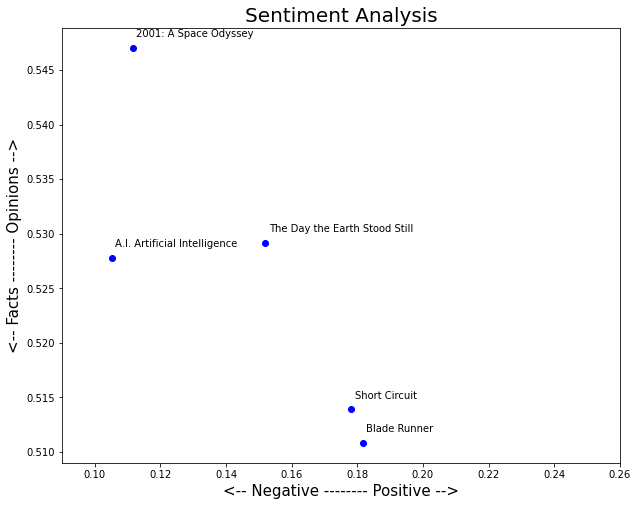

In [39]:
plt.rcParams['figure.figsize'] = [10, 8]

for index, movie in enumerate(data.index):
    x = data.polarity.loc[movie]
    y = data.subjectivity.loc[movie]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, movie, fontsize=10)
    plt.xlim(.09, .26) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

### Task 6 (3 points)

The sentiment we obtained was for the entire corpus. Please obtain the sentiment values for the first 5 reviews for each of the three movies.
Please check out the TextBlob's sentiment analysis API for more information. https://textblob.readthedocs.io/en/dev/quickstart.html#sentiment-analysis

Movie  2001: A Space Odyssey
Review  0  --> Sentiment:  0.11 Polarity:  0.57
Review  1  --> Sentiment:  0.14 Polarity:  0.44
Review  2  --> Sentiment:  0.16 Polarity:  0.55
Review  3  --> Sentiment:  0.03 Polarity:  0.67
Review  4  --> Sentiment:  0.23 Polarity:  0.51


Movie  A.I. Artificial Intelligence
Review  0  --> Sentiment:  0.04 Polarity:  0.52
Review  1  --> Sentiment:  0.18 Polarity:  0.52
Review  2  --> Sentiment:  0.07 Polarity:  0.59
Review  3  --> Sentiment:  0.07 Polarity:  0.51
Review  4  --> Sentiment:  0.05 Polarity:  0.53


Movie  Blade Runner
Review  0  --> Sentiment:  0.10 Polarity:  0.41
Review  1  --> Sentiment:  0.12 Polarity:  0.55
Review  2  --> Sentiment:  0.29 Polarity:  0.55
Review  3  --> Sentiment:  0.20 Polarity:  0.58
Review  4  --> Sentiment:  0.04 Polarity:  0.42


Movie  Short Circuit
Review  0  --> Sentiment:  0.19 Polarity:  0.44
Review  1  --> Sentiment:  0.16 Polarity:  0.60
Review  2  --> Sentiment:  0.18 Polarity:  0.34
Review  3  --> Sentiment

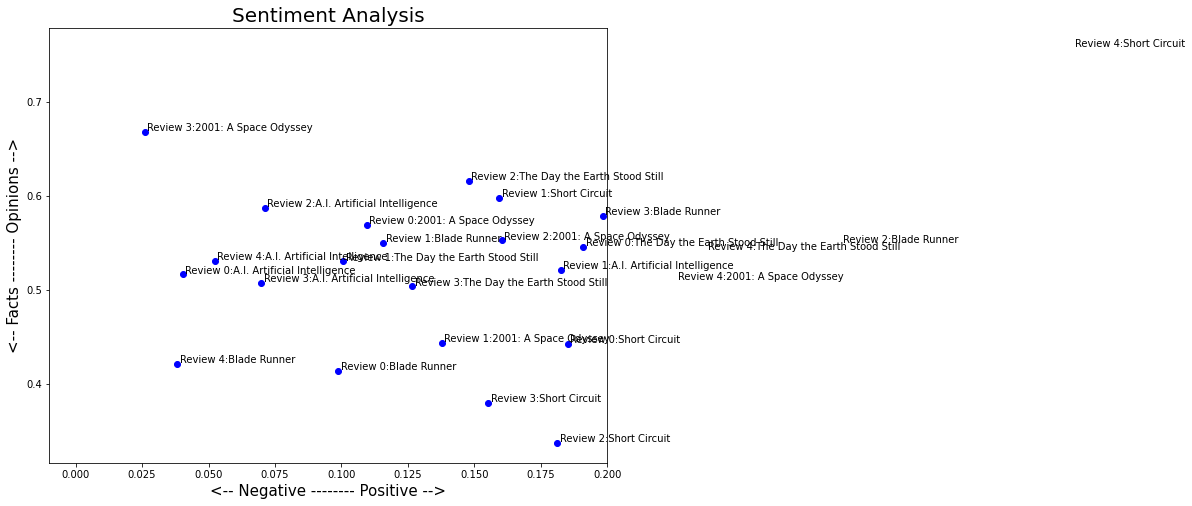

In [40]:
# Type your answer here.

# There are two options:
# Option 1: Split the review by the “permalink” 
# Option 2: Apply some BeautifulSoup magic to pick out the HTML parts that contain the individual reviews.

# Here's the code for option 1

# 1 point for loading the cleaned up data from Task 2
# If any such clean up is done here reduce 0.5 points
data_cleaned = pd.read_pickle('corpus_cleaned.pkl')
plt.rcParams['figure.figsize'] = [10, 8]

for index, movie in enumerate(data_cleaned.index):
    str_revs = data['review'].loc[movie]
    split_revs = str_revs.split('Permalink')
    print("Movie ", movie)
    for i in range(5):
      x = TextBlob(split_revs[i]).sentiment.polarity
      y = TextBlob(split_revs[i]).sentiment.subjectivity
      print("Review ", i , " --> " "Sentiment: ", "%.2f" % x , "Polarity: ", "%.2f" % y)
      plt.scatter(x, y, color='blue')
      plt.text(x+.001, y+.001, "Review " + str(i) + ":" + movie, fontsize=10)
      plt.xlim(-.01, .2) 
    print("\n") 

plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

# Part 3 - Topic Modeling

Another popular text analysis technique is called topic modeling. The ultimate goal of topic modeling is to find various topics that are present in your corpus. Each document in the corpus will be made up of at least one topic, if not multiple topics.

We will be covering the steps on how to do **Latent Dirichlet Allocation (LDA)**, which is one of many topic modeling techniques. It was specifically designed for text data.

To use a topic modeling technique, you need to provide (1) a document-term matrix and (2) the number of topics you would like the algorithm to pick up.

Once the topic modeling technique is applied, your job as a human is to interpret the results and see if the mix of words in each topic make sense. If they don't make sense, you can try changing up the number of topics, the terms in the document-term matrix, model parameters, or even try a different model.

First, let's read in our document-term matrix.

In [41]:
data = pd.read_pickle('dtm_stop.pkl')
data

,abandonment,abilities,ability,able,aboard,aboutbeauty,absence,absent,absolute,absolutely,absorb,absorbed,absorbing,absurd,abuse,abusive,academically,academy,accelerated,accent,accentuated,accentuation,accept,accepted,accessory,accidental,accidentally,acclaimed,accolades,accompanied,accompanies,accomplish,accomplished,accomplishment,according,account,accurate,accurately,accustomed,achieve,...,writitng,writs,written,wrong,ww,wwii,ya,yeah,yeahright,year,years,yearsadly,yearspeaking,yellow,yes,yesterday,york,youd,youll,youmichael,young,younger,youngest,youngsters,youre,yourselfthe,yourselvesscary,youth,youthe,youtube,youve,yup,zarathustra,zerogravity,zhora,zone,zoo,zooms,zora,zorba
2001: A Space Odyssey,0,0,0,5,0,1,2,1,0,4,0,0,1,0,0,0,0,1,0,0,1,0,2,0,0,0,0,0,1,0,0,1,0,3,0,0,3,1,0,1,...,0,0,0,5,0,0,0,1,0,3,10,0,0,0,3,0,1,1,3,0,0,0,0,0,2,1,0,0,0,1,0,0,9,3,0,0,1,0,0,0
A.I. Artificial Intelligence,0,0,0,1,0,0,0,0,1,4,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,...,1,0,1,2,0,0,1,0,0,3,6,0,0,0,3,0,1,0,5,0,4,4,1,0,2,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
Blade Runner,1,0,1,2,0,0,0,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,...,0,0,0,2,0,0,0,0,0,4,8,0,0,0,1,0,0,0,0,0,4,0,0,0,4,0,0,0,1,0,4,0,0,0,1,0,0,1,1,0
Short Circuit,0,0,1,3,1,0,0,0,0,1,0,0,0,0,1,1,0,4,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0,10,1,1,0,1,0,0,0,1,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
The Day the Earth Stood Still,0,1,2,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,...,0,0,4,1,2,1,0,1,1,2,19,0,0,1,3,2,1,0,0,1,7,0,0,0,0,0,1,0,0,0,0,1,0,0,0,3,0,0,0,1


Install the necessary modules for LDA with gensim (if not installed already).

In [42]:
!pip install gensim

Import the necessary modules for LDA with gensim.

In [43]:
from gensim import matutils, models
import scipy.sparse

# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

One of the required inputs is a term-document matrix.

In [44]:
tdm = data.transpose()
tdm.head()

,2001: A Space Odyssey,A.I. Artificial Intelligence,Blade Runner,Short Circuit,The Day the Earth Stood Still
abandonment,0,0,1,0,0
abilities,0,0,0,0,1
ability,0,0,1,1,2
able,5,1,2,3,2
aboard,0,0,0,1,0


We're going to put the term-document matrix into a new gensim format, from df --> sparse matrix --> gensim corpus.

In [45]:
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

Gensim also requires dictionary of the all terms and their respective location in the term-document matrix.

In [46]:
cv = pickle.load(open("cv_stop.pkl", "rb"))
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term), we need to specify two other parameters - the number of topics and the number of passes. Let's start the number of topics at 2, see if the results make sense, and increase the number from there.

In [47]:
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, passes=10)
lda.print_topics()

[(0,
  '0.006*"runner" + 0.006*"blade" + 0.004*"good" + 0.004*"really" + 0.003*"just" + 0.003*"people" + 0.003*"deckard" + 0.003*"story" + 0.003*"nerve" + 0.003*"films"'),
 (1,
  '0.004*"earth" + 0.004*"space" + 0.004*"just" + 0.004*"films" + 0.004*"people" + 0.004*"number" + 0.004*"robot" + 0.003*"think" + 0.003*"message" + 0.003*"great"')]

LDA for num_topics = 3

In [48]:
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=3, passes=10)
lda.print_topics()

[(0,
  '0.007*"space" + 0.005*"kubrick" + 0.004*"people" + 0.004*"films" + 0.004*"hal" + 0.004*"just" + 0.004*"effects" + 0.003*"great" + 0.003*"way" + 0.003*"art"'),
 (1,
  '0.009*"earth" + 0.007*"message" + 0.007*"klaatu" + 0.006*"day" + 0.004*"world" + 0.004*"story" + 0.004*"stood" + 0.004*"alien" + 0.003*"years" + 0.003*"classic"'),
 (2,
  '0.005*"runner" + 0.005*"blade" + 0.005*"good" + 0.005*"just" + 0.004*"number" + 0.004*"really" + 0.004*"people" + 0.003*"films" + 0.003*"life" + 0.003*"robot"')]

LDA for num_topics = 4

In [49]:
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=4, passes=10)
lda.print_topics()

[(0,
  '0.000*"people" + 0.000*"really" + 0.000*"good" + 0.000*"just" + 0.000*"films" + 0.000*"blade" + 0.000*"great" + 0.000*"runner" + 0.000*"life" + 0.000*"watch"'),
 (1,
  '0.000*"just" + 0.000*"people" + 0.000*"really" + 0.000*"good" + 0.000*"message" + 0.000*"nerve" + 0.000*"great" + 0.000*"plot" + 0.000*"films" + 0.000*"story"'),
 (2,
  '0.006*"good" + 0.005*"message" + 0.005*"just" + 0.005*"earth" + 0.005*"number" + 0.005*"robot" + 0.004*"people" + 0.004*"day" + 0.004*"really" + 0.004*"klaatu"'),
 (3,
  '0.006*"runner" + 0.006*"blade" + 0.005*"space" + 0.005*"films" + 0.004*"people" + 0.004*"just" + 0.004*"best" + 0.003*"effects" + 0.003*"kubrick" + 0.003*"really"')]

These topics aren't looking too great. We've tried modifying our parameters. Let's try modifying our terms list as well.

One popular trick is to look only at terms that are from one part of speech (only nouns, only adjectives, etc.).

We will need to dowload the following packages from nltk.

In [50]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

Let's create a function to pull out nouns from a string of text.

In [51]:
from nltk import word_tokenize, pos_tag

def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)

Read in the cleaned data, before the CountVectorizer step.

In [52]:
data_clean = pd.read_pickle('data_clean.pkl')
data_clean

,review
2001: A Space Odyssey,\na standalone monument in cinema history stanley kubricks magnum opus a space odyssey is an undeniable masterpiece not only shattered science ...
A.I. Artificial Intelligence,\nif you consider the concept only it could have been a decent film if it were more along the lines of the manga dead tube it could have further p...
Blade Runner,\na feast for the eyes dark and uncompromising with a haunting musical score by vangelis that adds a hypnotic quality to those breathtaking megaci...
Short Circuit,\nthere have been many films that claim they can entertain audiences of all ages indeed this seems to be the most profitable kind of film to make ...
The Day the Earth Stood Still,\nthe day the earth stood still is such a basic science fiction story that many firsttime viewers have been stunned by the reverence in which it i...


Apply the nouns function to the transcripts to filter only on nouns.

In [53]:
data_nouns = pd.DataFrame(data_clean.review.apply(nouns))
data_nouns

,review
2001: A Space Odyssey,standalone monument history stanley kubricks space odyssey masterpiece science fiction genre conventions cinema meaning grandiosity idea execution...
A.I. Artificial Intelligence,concept film lines manga tube potential act set matters message message concept tube message nose message events film feels something exciting vie...
Blade Runner,feast eyes dark score vangelis quality megacity landscapes los angeles adaptation philip k dicks bounty hunter story androids dream sheep work art...
Short Circuit,films audiences ages kind film denominator kind film market film audience age bracket promise i momentshort circuit heart comedy robot forces sold...
The Day the Earth Stood Still,day earth science fiction story viewers reverence alien earth warning weapons war space face annihilation fx space monsters score composer bernard...


Create a new document-term matrix using only nouns.

In [54]:
# Re-add the additional stop words since we are recreating the document-term matrix
add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate a document-term matrix with only nouns
cvn = CountVectorizer(stop_words=stop_words)
data_cvn = cvn.fit_transform(data_nouns.review)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names())
data_dtmn.index = data_nouns.index
data_dtmn

,abandonment,abilities,ability,absence,absolute,abuse,academy,accent,accentuation,accessory,accolades,accompanies,accomplishment,account,accurate,achievement,acidforblood,aclark,acquaintances,act,acting,action,actions,actionto,activities,activity,actor,actors,actress,acuity,ad,adam,adaptation,addition,addresses,adrenaline,adrenalinejunkies,adult,adultare,adults,...,worlds,worldthe,worldwhen,worth,worthy,wouldnt,wouldve,wound,wow,wrapsi,writer,writers,writing,writitng,wwii,ya,yeahright,year,years,yearspeaking,yes,yesterday,york,youd,youll,youmichael,youngsters,yourselfthe,youth,youtube,youve,yup,zarathustra,zerogravity,zhora,zone,zoo,zooms,zora,zorba
2001: A Space Odyssey,0,0,0,2,0,0,1,0,0,0,1,0,3,0,1,3,0,1,0,0,0,5,1,1,0,0,0,0,0,1,2,1,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,3,10,0,1,0,1,1,1,0,0,1,0,1,0,0,7,3,0,0,1,0,0,0
A.I. Artificial Intelligence,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,3,4,0,0,0,1,1,5,2,0,0,0,0,0,1,1,1,1,1,0,...,0,0,1,0,1,1,1,0,0,0,0,0,0,1,0,1,0,3,6,0,2,0,1,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
Blade Runner,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,5,0,0,0,0,1,5,0,0,0,0,1,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,2,0,0,0,1,0,0,0,0,4,8,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,1,0,0,1,1,0
Short Circuit,0,0,1,0,0,1,2,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,1,0,4,...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,10,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
The Day the Earth Stood Still,0,1,2,0,0,0,0,1,1,0,0,0,1,0,0,1,1,0,0,0,3,2,1,0,1,0,2,1,2,0,0,0,0,1,0,0,0,1,0,0,...,7,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,2,19,0,3,2,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1


In [55]:
# Create the gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())

In [56]:
# Let's start with 2 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=2, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.029*"film" + 0.024*"movie" + 0.012*"review" + 0.012*"sign" + 0.011*"helpful" + 0.007*"films" + 0.007*"permalink" + 0.006*"story" + 0.006*"space" + 0.005*"message"'),
 (1,
  '0.001*"film" + 0.001*"movie" + 0.000*"sign" + 0.000*"review" + 0.000*"helpful" + 0.000*"films" + 0.000*"space" + 0.000*"permalink" + 0.000*"earth" + 0.000*"years"')]

### Task 7 (2 points)

Write the code to print 3 topics on the document-term matrix with nouns. (1 point)

What are the three topics you would determine out of the results you see. _(This is a written answer question.)_ (1 point)

In [57]:
# Type your code here.
ldan_3 = models.LdaModel(corpus=corpusn, num_topics=3, id2word=id2wordn, passes=10)
ldan_3.print_topics()

[(0,
  '0.025*"film" + 0.019*"movie" + 0.013*"space" + 0.009*"films" + 0.008*"review" + 0.008*"sign" + 0.008*"effects" + 0.007*"helpful" + 0.007*"way" + 0.006*"kubrick"'),
 (1,
  '0.028*"movie" + 0.022*"film" + 0.014*"review" + 0.013*"sign" + 0.013*"helpful" + 0.009*"message" + 0.009*"number" + 0.008*"permalink" + 0.007*"day" + 0.007*"robot"'),
 (2,
  '0.033*"film" + 0.018*"runner" + 0.014*"movie" + 0.012*"blade" + 0.008*"review" + 0.008*"sign" + 0.008*"helpful" + 0.007*"replicants" + 0.007*"directors" + 0.006*"films"')]

_Type your 3 chosen topics (1 point)_
<font color='red'>Full points are awarded to any good topics as demonstrated by the output above (copied below). 

[
  (0,
  '0.017*"movie" + 0.014*"film" + 0.013*"message" + 0.013*"earth" + 0.011*"day" + 0.010*"klaatu" + 0.008*"sign" + 0.008*"review" + 0.008*"helpful" + 0.008*"world"'),
 
 (1,
  '0.022*"movie" + 0.019*"film" + 0.011*"review" + 0.010*"helpful" + 0.010*"sign" + 0.010*"nerve" + 0.010*"game" + 0.008*"roberts" + 0.007*"permalink" + 0.005*"way"'),
 
 (2,
  '0.034*"film" + 0.023*"movie" + 0.012*"review" + 0.011*"sign" + 0.011*"helpful" + 0.009*"films" + 0.008*"runner" + 0.008*"space" + 0.007*"number" + 0.007*"permalink"')]

For example, in the case of the topics generated for the reference answer, the first two words of all three suggested topics are <b>movie</b> and <b>film</b>. The word <b>review</b> also appears with a high score in at least the last two topics. Ignoring the words that are common between all three sets of topics, the main topics from the outputs can also be <b>message to earth</b>, <b>sign</b>, and <b>runner</b>. These topics may not make much sense, and in order to get a good topic distribution we will need to increase the corpus size.</font>

### Task 8 (5 points)

Complete the function to pull out both nouns and adjectives from a string of text. Adjectives are marked as 'JJ' in nltk. (2 points)

Apply the `nouns_adj` function to the reviews and determine the 3 best topics. (1 point)

What are the 3 best topics? How do they compare to the previous topics you selected? (2 points)


In [59]:
def nouns_adj(text):
  # Type your code to complete the function.
  # 1 point for applying for NN and JJ
  is_noun = lambda pos: pos[:2] == 'NN' # or the students can nouns from text using nouns(text)
  is_adj =  lambda pos: pos[:2] == 'JJ'
  tokenized = word_tokenize(text)
  all_nouns_adj = [word for (word, pos) in pos_tag(tokenized) if (is_noun(pos) or is_adj(pos))]
  # 1 point returning the correct thing
  return ' '.join(all_nouns_adj)

data_nouns_adj = pd.DataFrame(data_clean.review.apply(nouns_adj))

# Recreate a document-term matrix with only nouns/adjs
cvna = CountVectorizer(stop_words=stop_words)
data_cvna = cvna.fit_transform(data_nouns_adj.review)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
data_dtmna.index = data_nouns_adj.index

corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

# 1 point to apply the `nouns_adj` function to the reviews and determine the 3 best topics
ldana = models.LdaModel(corpus=corpusna, num_topics=3, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.001*"film" + 0.001*"movie" + 0.001*"helpful" + 0.000*"review" + 0.000*"great" + 0.000*"sign" + 0.000*"films" + 0.000*"blade" + 0.000*"runner" + 0.000*"number"'),
 (1,
  '0.013*"movie" + 0.012*"helpful" + 0.010*"earth" + 0.010*"film" + 0.010*"message" + 0.008*"day" + 0.007*"klaatu" + 0.006*"sign" + 0.006*"review" + 0.006*"world"'),
 (2,
  '0.024*"film" + 0.019*"movie" + 0.017*"helpful" + 0.009*"review" + 0.009*"sign" + 0.006*"good" + 0.006*"films" + 0.006*"permalink" + 0.005*"runner" + 0.005*"great"')]

_Please type your answer to "What are the 3 best topics"? (1 point)_

<font color='red'>

[
  (0,
  '0.001*"film" + 0.001*"movie" + 0.001*"helpful" + 0.000*"review" + 0.000*"great" + 0.000*"sign" + 0.000*"films" + 0.000*"blade" + 0.000*"runner" + 0.000*"number"'),
 
 (1,
  '0.013*"movie" + 0.012*"helpful" + 0.010*"earth" + 0.010*"film" + 0.010*"message" + 0.008*"day" + 0.007*"klaatu" + 0.006*"sign" + 0.006*"review" + 0.006*"world"'),
 
 (2,
  '0.024*"film" + 0.019*"movie" + 0.017*"helpful" + 0.009*"review" + 0.009*"sign" + 0.006*"good" + 0.006*"films" + 0.006*"permalink" + 0.005*"runner" + 0.005*"great"')]

According to the values assigned to each word, the three best topics seem to be"
0. film/movie (almost insignificant emphasis of sci-fi)
1. helpful (?!)
2. review 

Note: These answers could be different for you, but as long as the topics chosen is justifiable by the scores obtained full points will be awarded.
</font>

_Please type your answer to "How do they compare to the previous topics you selected?" (1 point)_

<font color='red'>The highest scoring topic for each set is still fairly generic, with "movie" and "film" appearing in all the topic categories. Therefore the topics generated in this example are not any different from the previous topics selected. This actually demonstrates the need to clean up the data even further. The word "helpful" most likely comes from the website asking people to rate the review, and such words should, in fact, be in the "stop words" list. Furthermore, since all three topics have the words movie/films in them, in order to ascertain better topics, we may want to add such words into the stop words list as well.
</font>

**Identify topics in the reviews for each movie**

Let's take a look at which topic each set of movie reviews contains. If you have defined `corpusna` and `ldana` correctly above, the following code should run and display the topics for each movie based on their IMDB reviews.

In [61]:
corpus_transformed = ldana[corpusna]
list(zip([a for [(a,b)] in corpus_transformed], data_dtmna.index))

[(2, '2001: A Space Odyssey'),
 (2, 'A.I. Artificial Intelligence'),
 (2, 'Blade Runner'),
 (2, 'Short Circuit'),
 (1, 'The Day the Earth Stood Still')]

# Part 4 - Word Vectors

Next, we turn our attention to some of the mode advanced (and recent) deep learning NLP libraries to learn aboout vector representations of language .

First, we will take a look at [Spacy](https://spacy.io).

Let's first install spacy (if not installed already).



In [60]:
!pip install -U spacy
!python -m spacy download en_core_web_md

     |████████████████████████████████| 6.4 MB 12.6 MB/s 
     |████████████████████████████████| 10.1 MB 56.8 MB/s 
     |████████████████████████████████| 42 kB 1.1 MB/s 
     |████████████████████████████████| 621 kB 51.1 MB/s 
     |████████████████████████████████| 456 kB 60.3 MB/s 
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4
2021-07-31 14:06:27.977124: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfull

spaCy can compare two objects and predict how similar they are – for example, documents, spans or single tokens.

The Doc, Token and Span objects have a .similarity method that takes another object and returns a floating point number between 0 and 1, indicating how similar they are.

One thing that's very important: In order to use similarity, you need a larger spaCy model that has word vectors included.

For example, the medium or large English model – but not the small one. So if you want to use vectors, always go with a model that ends in "md" or "lg". You can find more details on this in the [models documentation](https://spacy.io/models).

Here's an example. Let's say we want to find out whether two documents are similar.

First, we load the medium English model, "en_core_web_md".

We can then create two doc objects and use the first doc's similarity method to compare it to the second.

Here, a fairly high similarity score of 0.86 is predicted for "I like fast food" and "I like pizza".

The same works for tokens.

According to the word vectors, the tokens "pizza" and "pasta" are kind of similar, and receive a high score.

In [62]:
import spacy
# Load the model with vectors
nlp = spacy.load("en_core_web_md")

# Compare two documents
doc1 = nlp("I like fast food")
doc2 = nlp("I like pizza")
print(doc1.similarity(doc2))

0.8627204117787385


### Task 9 (2 points)

Obtain 2 movies reviews from our mini-movie review corpus and see how similar they are.

In [64]:
# Type your code here
doc1 = nlp(data_clean['review'].loc['The Day the Earth Stood Still'])
doc2 = nlp(data_clean['review'].loc['2001: A Space Odyssey'])
print(doc1.similarity(doc2))



0.997803391181852


**Word vectors in Spacy**

To give you an idea of what those vectors look like, here's an example.

First, we load the medium model again, which ships with word vectors.

Next, we can process a text and look up a token's vector using the .vector attribute.

The result is a 300-dimensional vector of the word "movie".

In [65]:
# Load a larger model with vectors
nlp = spacy.load("en_core_web_md")

doc = nlp("movie")
# Access the vector via the token.vector attribute
print(doc.vector)

[ 2.0710e-01 -4.7656e-01  1.5479e-01 -3.8965e-01  4.8447e-01  5.9815e-01
 -6.0361e-02 -6.6422e-01  5.3934e-01  1.8491e+00 -3.0595e-01  3.5849e-01
  4.8760e-01 -1.7715e-01 -1.5448e-01 -1.6732e-02  4.9752e-01  6.0761e-01
 -6.8789e-01  7.9932e-02 -3.6166e-01 -7.1046e-01  5.9322e-01  5.8712e-02
  6.1551e-02  6.4212e-01 -2.3157e-01 -4.6528e-01 -5.0984e-01 -7.2840e-02
 -1.7711e-02 -5.7277e-01 -2.1122e-01  5.5066e-01  4.8092e-02 -1.4431e-01
  1.4189e-01  2.6226e-01 -5.8394e-01  3.8901e-01  4.1958e-01 -2.0731e-01
  1.5663e-01 -4.4107e-01  3.0562e-01  9.6708e-02  1.3916e-01  1.0335e-02
 -3.2717e-02 -5.7420e-01  6.2223e-01 -2.9390e-01  2.9001e-01 -1.6932e-01
 -2.7118e-01  1.2735e-01 -2.9766e-02 -7.9835e-01 -2.4082e-01 -5.7272e-01
 -1.3385e-01 -2.5457e-04  5.8948e-01  3.4175e-01  2.8423e-01 -4.6960e-01
  1.5337e-01 -8.2005e-02 -2.3874e-01 -3.3641e-01  5.9665e-01 -7.3306e-01
  3.0852e-02 -1.4965e-01  4.1782e-01 -3.9437e-02 -4.5271e-01  4.4231e-01
  5.9446e-01  8.8170e-01  4.7335e-02 -4.3555e-01  3

Predicting similarity can be useful for many types of applications. For example, to recommend a user similar texts based on the ones they have read. It can also be helpful to flag duplicate content, like posts on an online platform.


In [66]:
review1 = "I love the movie"
review2 = "I hate the movie"

doc1 = nlp(review1)
doc2 = nlp(review2)

print(doc1.similarity(doc2))

0.9586172091230681


### Task 10 (2 points)

The similarity of the statements "I like the movie" and "I hate the movie" received a high score in the vector space, despite being opposites. What might this be? _(This is a written answer question)._

<font color='red'>
spaCy's default word vectors assign a very high similarity score to "I like the movies" and "I hate the movie". This makes sense, because both texts express sentiment about movies. But in a different application context, you might want to consider the phrases as very dissimilar, because they talk about opposite sentiments. Therefore, it's important to keep in mind that there's no objective definition of what's similar and what isn't. It always depends on the context and what your application needs to do.
</font>

# Part 5 - Text Classification, Generation, and Summarization



In this part of the lab, we will be exploring the [HuggingFace](https:/huggingface.co/) library that implements the state of the art transformer models we discussed in class.

Let's first install `transformers` if not installed already.

In [67]:
!pip install transformers[sentencepiece]

     |████████████████████████████████| 2.6 MB 13.8 MB/s 
     |████████████████████████████████| 895 kB 46.1 MB/s 
     |████████████████████████████████| 3.3 MB 61.5 MB/s 
     |████████████████████████████████| 636 kB 66.7 MB/s 
     |████████████████████████████████| 1.1 MB 24.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


Before we move on to text generation, let's see how transformers can perform some of the tasks we already covered in this lab.

Note: these transformer models are really large. For example, BERT-large has 24-layers and  a total of 340M parameters! Altogether it is 1.34GB, so expect these transformer models to take a couple minutes to download to your Colab instance.  (Note that this download is not using your own network bandwidth or your Google Drive space--it's between the Google instance and wherever the model is stored on the web).

**Sentiment Analysis**

In [68]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")
reviews = [
    review1,
    review2,
]
review_sentiment = classifier(reviews)
result = "\n".join("{} {}".format(x, y) for x, y in zip(reviews, review_sentiment))
print(result)


I love the movie {'label': 'POSITIVE', 'score': 0.9998714923858643}
I hate the movie {'label': 'NEGATIVE', 'score': 0.9996225237846375}


### Task 11 (2 points)

Using HuggingFace's transformer library, print the sentiment scores of at least two random movie reviews from each of the movies in our small IMDB corpus. If there are `n` movies, you must print at most `2n` sentiment scores.

In [78]:
#Type your code here
import random

for key in data.keys():
  print(key)
  revs = []
  for i in range(2):
    trunc_rev = data[key][random.randint(0, len(data[key])-1)][0:1024] #causing buffer overflow when reviews are too large, shortening
    trunc_rev = clean_text_round2(clean_text_round1(trunc_rev))
    revs.append(trunc_rev)
  review_sentiment = classifier(revs)
  result = "\n".join("{} {}".format(x, y) for x, y in zip(revs, review_sentiment))
  print(result)

review
there have been many films that claim they can entertain audiences of all ages indeed this seems to be the most profitable kind of film to make with the familyoriented often translating to the lowest common denominator there is a rare kind of film in this oversaturated market however namely the film that claims it can entertain an audience in almost any age bracket and really can deliver on this promise i know how this sounds so bear with me a momentshort circuit is at heart a comedy about what happens when a robot designed to replace a special forces soldier is struck by lightning and starts to believe he is a living entity much of the rest of the film revolves around either number  attempts to evade capture by the people who made him or his attempts to convince the people he meets of the truly wonderful thing that has happened to him ally sheedy and steve guttenberg provide an excellent support cast that does a first rate job of interacting with the character this was one of t

**Text classification**

The sentiment analysis we saw earlier can be thought of a type of a binary classification problem. However, a more challenging task is where we need to classify texts that haven’t been labelled. This is a common scenario in real-world application because annotating text is usually time-consuming and requires domain expertise. 

For this use case, the **zero-shot-classification** pipeline in HuggingFace is very powerful: it allows you to specify which labels to use for the classification, so you don’t have to rely on the labels of the pretrained model. You’ve already seen how the model can classify a sentence as positive or negative using those two labels — but it can also classify the text using any other set of labels you like.

We will use the description of the AI in Fact and Fiction class, and along with several candidate topics, let's see what the transformer model classifies this text to be. As you can see, the category "Education" has a higher score.

In [75]:
course_description = '''The class will explore current AI topics through reading, writing, programming,
and exploring some of the classic fiction that has former people's (mis)perceptions
of machine intelligence. This course will give students an appreciation on how to
separate fiction from fact, and how to critically evaluate the impact current and
upcoming AI topics will have on society.'''
text_classifier = pipeline("zero-shot-classification")
text_classifier(
    course_description,
    candidate_labels=["education", "politics", "business"],
)

{'labels': ['education', 'business', 'politics'],
 'scores': [0.836330771446228, 0.12098929286003113, 0.04267996549606323],
 'sequence': "The class will explore current AI topics through reading, writing, programming,\nand exploring some of the classic fiction that has former people's (mis)perceptions\nof machine intelligence. This course will give students an appreciation on how to\nseparate fiction from fact, and how to critically evaluate the impact current and\nupcoming AI topics will have on society."}

### Task 12 (4 points)

Using the entire IMDB movie review corpus, and the individual sets of movie reviews for each of the three movies we have seen / will be seeing in class, classify them according to 3 distinct topics (these topics cannot be the sentiment, i.e., positive or negative, or it cannot be "review"). (3 points)

What are your observations on the topic distribution across the 3 movies based on their reviews? (1 point) _(This is a written answer question.)_

In [83]:
# Type your code here
data = pd.read_pickle('data_clean.pkl')
for index, movie in enumerate(data.index):
  reviews = data['review'].loc[movie]
  res = text_classifier(
    reviews,
    candidate_labels=["AI", "fiction", "fact"],
)
  print(movie)
  print(res['labels'])
  print(res['scores'])

2001: A Space Odyssey
['fact', 'fiction', 'AI']
[0.3970681428909302, 0.32894179224967957, 0.27399006485939026]
A.I. Artificial Intelligence
['fact', 'fiction', 'AI']
[0.36158034205436707, 0.3541368246078491, 0.2842828333377838]
Blade Runner
['fact', 'fiction', 'AI']
[0.3571349084377289, 0.3299773335456848, 0.3128877282142639]
Short Circuit
['fact', 'AI', 'fiction']
[0.5024052262306213, 0.2641877830028534, 0.23340700566768646]
The Day the Earth Stood Still
['fact', 'fiction', 'AI']
[0.42251089215278625, 0.3319077789783478, 0.2455812692642212]


<font color='red'>
Points are awarded for any valid observation on the three candidate labels selected.
For example, the students may provide a justification such as the following for the following candidate labels: "AI," "fiction," "fact."
It is possible that the topic of the reviews focused less on the movie's themes and more about other aspects of the movie, like its script or special effects, which could explain the unexpected (low) scores. The same is true of all the topic scores analyzed for all of the movies, as some of the topics may not be relevant for some of the movies. Interestingly, in the example above, we used the acronym "AI," which resulted in poor results in all three (or five) movies. This could signal that the language model does not necessarily know how to expand such acronyms.
</font>

**Text Generation**

Now let’s see how to use a pipeline to generate some text. The main idea here is that you provide a prompt and the model will auto-complete it by generating the remaining text. This is similar to the predictive text feature that is found on many phones. Text generation involves randomness, so it’s normal if you don’t get the same results when you run the code again.

In [ ]:
generator = pipeline("text-generation")
generator("In this course, we will teach you how to")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'In this course, we will teach you how to create a website utilizing the JavaScript and REST API of web applications. The way we think about this subject is important. However, we will also teach you how to use the REST API of web applications with'}]

**Using a specific model**

The previous example used the default model for text generation, but you can also choose a particular model from the [Transformer Model Hub](https://huggingface.co/models). Go to the Model Hub and click on the corresponding tag on the left to display only the supported models a given task, i.e., text generation.

Let’s try the distilgpt2 model! Here’s how to load it in the same pipeline as before:

In [84]:
generator = pipeline("text-generation", model="distilgpt2")
generator(
    "In this course, we will teach you how to",
    max_length=30,
    num_return_sequences=2,
)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'In this course, we will teach you how to create a beautiful house with very great properties, including the very top level and the beautiful back floor.'},
 {'generated_text': 'In this course, we will teach you how to create functional programming. We teach you how to create a modular and dynamic codebase:\n\n\n'}]

### Task 13 (3 points)

Generate a movie review with at most 100 words for your favorite movie. You must use another model that is not `distilgpt2` for this task. Please check the available text generation models from the [Transformer Model Hub](https://huggingface.co/models) for this purpose. (2 points)

How do you compare the quality of this review to the same review that would be generated from the `distilgpt2` model? (1 point) _(This is a written answer question.)_

In [85]:
# Type your code here.
generator = pipeline('text-generation', model='gpt2')
generator("Blade runner is ", max_length=100)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Blade runner is \xa0a great asset to look at when developing your games: what do the decks look like, what do they do, and what is most important to you at times. However, in this post I\'ll go a step further this time, and go over the basics and tricks with how to build a powerful runner.\nUnderstanding the Runner\'s Name, Position, and Other Traits\nNow this is a bit of a wrap. Each player uses their own "Runner". It does'}]

<font color='red'>
Any valid explanation such as the following:

The distilgpt2 review was far better than the review generated using the plain vanilla gpt2 model, which assumed "Blade Runner" was a game and not a movie. The distilgpt2 review included information about themes and events within the movie, so it is not a good review by any means, but it is at least about a movie.
</font>

**Text Summarization**

Summarization is the task of reducing a text into a shorter text while keeping all (or most) of the important aspects referenced in the text. Here’s an example where we attempt to shorten the course description to 50 words:

In [86]:
summarizer = pipeline("summarization")
summarizer(course_description, max_length=20)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)


[{'summary_text': ' The class will explore current AI topics through reading, writing, programming, and exploring some'}]

### Task 14 (2 points)

Shorten the entire movie review corpus (i.e., all the reviews from all the movies) to 100 words.

In [88]:
# Type your code here.
all_reviews = ""
# 1 point for using all the movie reviews
data = pd.read_pickle('data_clean.pkl')
for index, movie in enumerate(data.index):
  all_reviews = all_reviews + " " + data["review"].loc[movie]

# 1 point for using the summarizer and printing the result
summary = summarizer(all_reviews, max_length=100, truncation=True)
print(summary)

[{'summary_text': ' A space odyssey is a groundbreaking achievement both on a conceptual and technical level is a hell of an accomplishment but to transcend the audience to a whole new dimension all in one is sheer genius at its highest format its premiere polarized critics and audiences alike walkouts numbered well over .'}]


# Part 6 - Question Answering

**BERT**, or **B**idirectional **E**mbedding **R**epresentations from **T**ransformers, is a new method of training language representations which obtains state-of-the-art results on a wide array of Natural Language Processing (NLP) tasks. The academic paper can be found here: https://arxiv.org/abs/1810.04805. (You do not have to read it as part of this lab, but it is a good reference if you want to understand the inner-workings of BERT.) 

The model we are using in this lab is a pre-trained model released by Google that ran for many, many hours on Wikipedia, and [Book Corpus](https://arxiv.org/pdf/1506.06724.pdf), a dataset containing +10,000 books of different genres. For question answering, we could get decent results using a BERT model that's already been fine-tuned on the Stanford Question Answering Dataset (SQuAD) benchmark: https://rajpurkar.github.io/SQuAD-explorer/explore/v2.0/dev/. 

Import all the necessary libraries.

In [89]:
question_answerer = pipeline("question-answering")
question_answerer(
    question="What is this course about",
    context=course_description
)

{'answer': 'give students an appreciation on how to\nseparate fiction from fact',
 'end': 272,
 'score': 0.11335408687591553,
 'start': 206}

### Task 15 (3 points)

Let's get some answers to some questions about the movie "The Day the Earth Stood Still" based on the reviews for that movie. You must compile at least 5 questions about the movie from the review. Your code must use a specific question answer model from the [Transformer Model Hub](https://huggingface.co/models). (2 points)

What is the model you selected, and why did you select it? (you may compare it with some other model and describe pros and cons of your chosen model) (1 point) _(This is a written answer question.)_

In [92]:
#Type your code here
question_answerer = pipeline(model="deepset/roberta-base-squad2", 
                             tokenizer="deepset/roberta-base-squad2",
                             revision="v1.0", 
                             task="question-answering")
cont = data["review"].loc["The Day the Earth Stood Still"]
questions = ["Who directed the movie", 
             "What are the main characters", 
             "What year did the movie premier",
             "Where did the movie take place",
             "Who is the main actor of the movie"]

for question in questions:
  answer = question_answerer(question, cont)
  print(question, answer)


Who directed the movie {'score': 0.9761946797370911, 'start': 28777, 'end': 28788, 'answer': 'Robert Wise'}
What are the main characters {'score': 0.7553425431251526, 'start': 4701, 'end': 4716, 'answer': 'Gort and Klaatu'}
What year did the movie premier {'score': 0.988720715045929, 'start': 46119, 'end': 46123, 'answer': '1951'}
Where did the movie take place {'score': 0.010813018307089806, 'start': 43634, 'end': 43649, 'answer': 'Washington D.C.'}
Who is the main actor of the movie {'score': 0.9771230220794678, 'start': 43504, 'end': 43516, 'answer': 'Keanu Reeves'}


<font color='red'>Any valid explanation on the choice of the model, along the lines of the accuracy of the generated answers, running time against another model, and any compelling features in the project documentation of the model selected. </font>